In [1]:
from math import sqrt
from datetime import datetime
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, Bidirectional, GRU
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import datetime as dt
import random
from scipy.spatial import distance


In [3]:
# Datayı Yükleyelim
path = r'c:\sxk990_6ay.xlsx'
data = pd.read_excel(path, date_format=[0])
# İlk 5 Satır
data.head()

,DATE_TIME,MAXIMUM_SPEED,MINIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2022-01-01 00:00:00,133,1,60,149
1,2022-01-01 01:00:00,133,8,63,130
2,2022-01-01 02:00:00,139,7,69,101
3,2022-01-01 03:00:00,145,3,61,90
4,2022-01-01 04:00:00,148,6,73,55


In [4]:
#Datetime Haline Getirilmesi
data['DATE_TIME'] = pd.to_datetime(data.DATE_TIME, format='%Y-%m-%d %H:%M')
#İndex'e Alınması
data.index = data.DATE_TIME

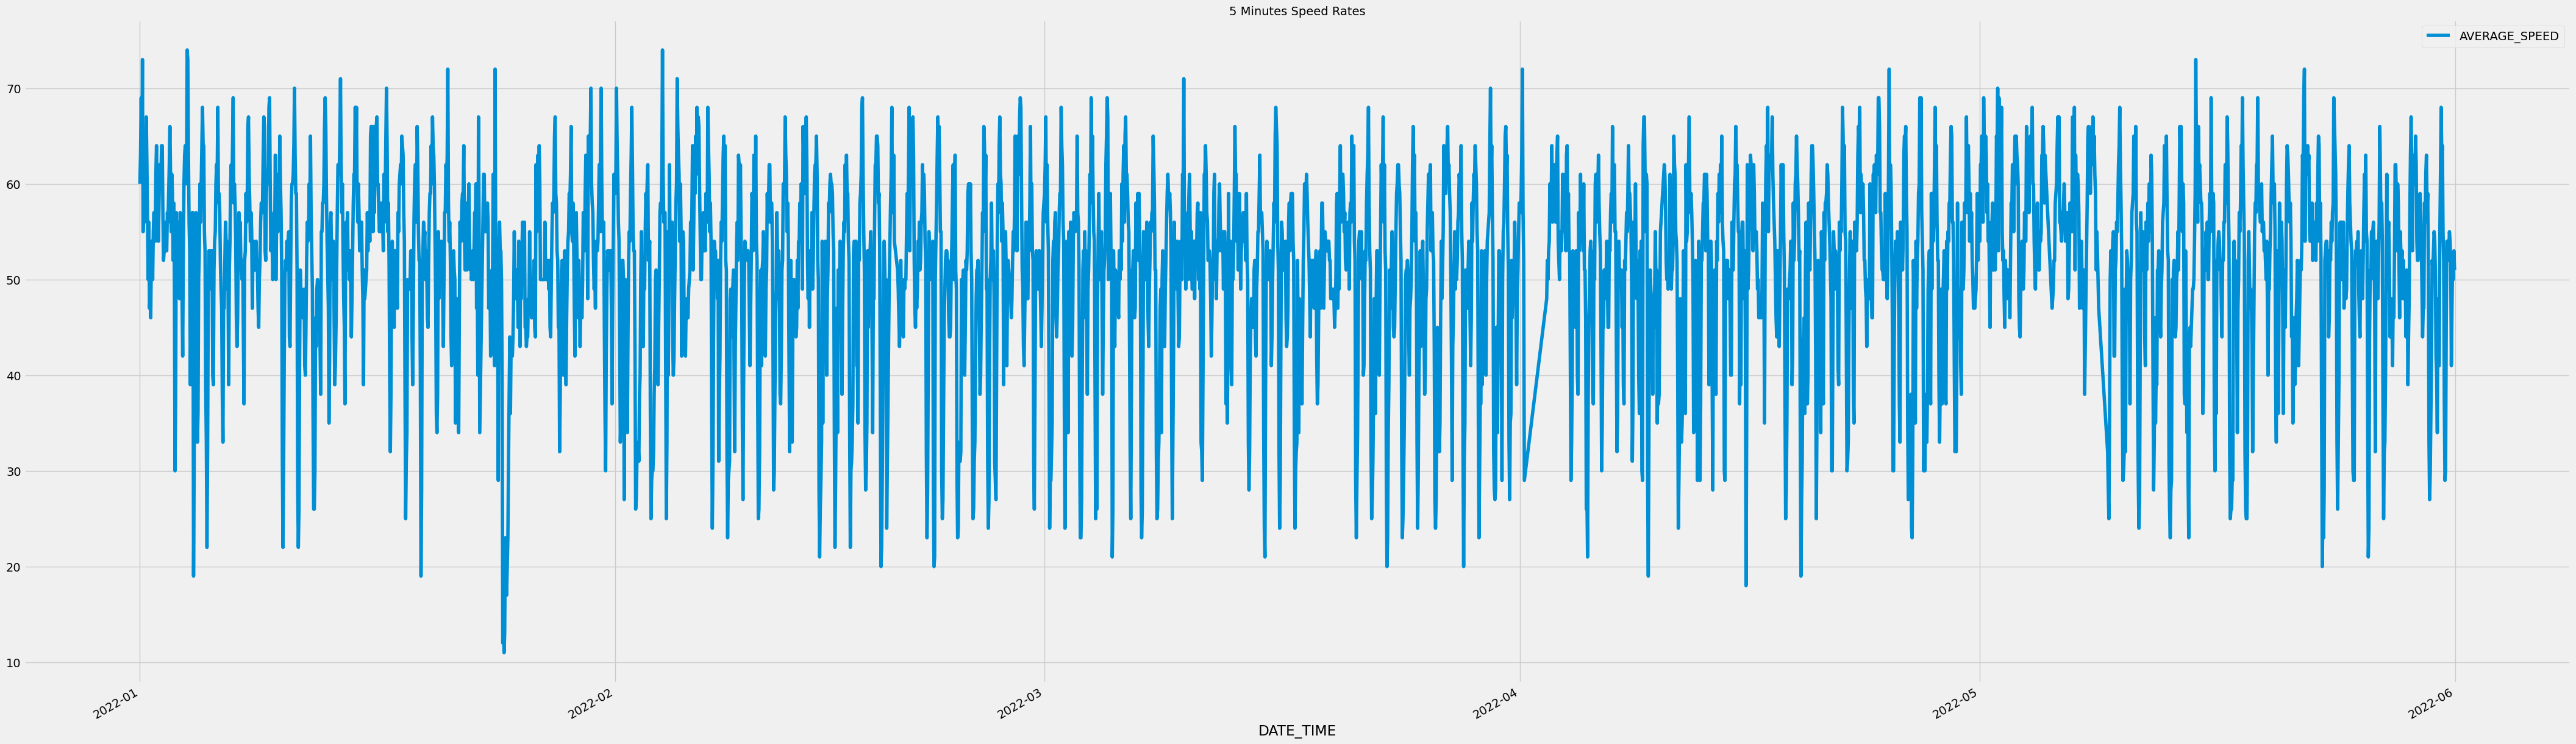

In [5]:
fig = plt.figure(figsize=(48,16))
data.AVERAGE_SPEED.plot(label='AVERAGE_SPEED')
plt.legend(loc='best')
plt.title('5 Minutes Speed Rates', fontsize=14)
plt.show()

In [6]:
values = data['AVERAGE_SPEED'].values.reshape(-1,1)
values = values.astype('float32')

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

In [8]:
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Veri Seti Sayıları (training set, test set): " + str((len(train), len(test))))
#dataset[train_size:len(dataset)]

Veri Seti Sayıları (training set, test set): (2122, 1415)


In [9]:
def create_dataset(dataset, window_size):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[(i + window_size), 0])
    return(np.array(data_X), np.array(data_Y))

In [10]:
# Verisetlerimizi Oluşturalım
window_size = 6
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(2115, 6)


In [11]:
# define the fi function to construct the fi matrix 
def fi(x,cListe,sigmaListe):
    fimatris = []
    for i in range(0, fi_n):
        fimatris += [np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2))]
    fimatris = np.array(fimatris)
    return (fimatris)

# derivative of fi-c-matris
def derivfic(x,cListe,sigmaListe):
    derivficmatris = []
    for i in range(0, fi_n):
        derivficmatris += [((x - cListe[1][i, :]) / (sigmaListe[1][0, i] ** 2)) * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivficmatris = np.array(derivficmatris)
    return (derivficmatris)

# derivative of fi-sigma
def derivfisigma(x,cListe,sigmaListe):
    derivfimatris = []
    for i in range(0, fi_n):
        derivfimatris += [((distance.euclidean(x, cListe[1][i, :])) ** 2) / sigmaListe[1][0, i] ** 3 * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivfimatris = np.array(derivfimatris)
    return (derivfimatris)

# define the Wturet function to calculate weight matrix
def Wturet(WListe,e):
    Wturet = []
    turet = np.dot(WListe[1].T, e.reshape(Outputcolumn, 1))
    for i in range(0, Inputcolumn):
        Wturet += [turet]
    Wturet = np.array(Wturet)
    return ((Wturet.T).reshape(fi_n, Inputcolumn))



In [12]:
Inputmatrix = train_X
Inputcolumn = Inputmatrix.shape[1]
Inputrow = Inputmatrix.shape[0]
train_Y = train_Y.reshape(-1,1)
Outputmatrix = train_Y
Outputcolumn = Outputmatrix.shape[1]
Outputrow = Outputmatrix.shape[0]


Inputtestmatrix = test_X
Inputtestcolumn = Inputtestmatrix.shape[1]
Inputtestrow = Inputtestmatrix.shape[0]
test_Y = test_Y.reshape(-1,1)
Outputmatrixtest = test_Y
Outputtestcolumn = Outputmatrixtest.shape[1]
Outputtestrow = Outputmatrixtest.shape[0]

In [13]:

# define the number of neuron
fi_n = Inputcolumn + 1

# define the epsilon for stop criteria
epsilon = 0.1

# define the alpha value for momentum term
alfa = 0.7


# define necessary variables
E_iterasyon = []
E_iterasyon_test = []
EgitimSure = []

itrsayisi = 500


In [14]:

n1 = dt.datetime.now()
    # define the matrix consisting of c vectors
ceski = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cyeni = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cListe = [np.array(ceski), np.array(cyeni)]

    # define the array containing the sigma values
sigmaeski = [[round(random.uniform(0.5, 1.5), 2) for x in range(fi_n)] for y in range(1)]
sigmayeni = [[round(random.uniform(0.5, 1.5), 2) for x in range(fi_n)] for y in range(1)]
sigmaListe = [np.array(sigmaeski), np.array(sigmayeni)]

    # create weight matrices that will be used for the momentum term
Weski = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
Wyeni = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
WListe = [np.array(Weski), np.array(Wyeni)]

E = []
W_son = []
E_ort = []
E_ani_max = []

In [15]:
# Training phase:
for j in range(0, itrsayisi):

        # define step sizes to update weights
        adimbuyuklugu = 0.80 - j * (0.60 / itrsayisi)

        E_ani = []
        
        for i in range(0, Inputrow):
            # calculate output value 
            Y = np.dot(WListe[1], fi(Inputmatrix[i, :],cListe,sigmaListe))

            # calculate error term
            e = Outputmatrix[i, :] - Y
            E_ani.append(0.5 * np.dot(e.T, e))

            
            # keep the weights before update
            W_tut = WListe[1]
            c_tut = cListe[1]
            sigma_tut = sigmaListe[1]
            # keep updated weights as second item of list
            WListe[1] = WListe[1] + adimbuyuklugu * np.dot(e.reshape(Outputcolumn, 1),
                                                           fi(Inputmatrix[i, :],cListe,sigmaListe).reshape(1, fi_n)) + alfa * (
                                    WListe[1] - WListe[0])
            cListe[1] = cListe[1] + adimbuyuklugu * Wturet(WListe,e) * derivfic(Inputmatrix[i, :],cListe,sigmaListe) + alfa * (
                        cListe[1] - cListe[0])
            sigmaListe[1] = sigmaListe[1] + adimbuyuklugu * np.dot(WListe[1].T, e.reshape(Outputcolumn, 1)) * (
                derivfisigma(Inputmatrix[i, :],cListe,sigmaListe).reshape(fi_n, 1)) + alfa * (sigmaListe[1] - sigmaListe[0])
            # keep the weights of one step before as the first item in the list
            WListe[0] = W_tut
            cListe[0] = c_tut
            sigmaListe[0] = sigma_tut

        #E.append(np.mean(E_ani))
    # 4. loss function Hesaplama
    
        #E_ani.append((1 / 2) * np.dot(e.T, e))
    
        E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
        E_ani_max.append(max(E_ani))
    
        if j >= 21:
           if abs((E_ort[j - 1]) - (E_ort[j])) <= 0.0000000001 or (E_ort[j - 20]) - (E_ort[j]) <  -0.005:
             print("E_ort_degisim=",(E_ort[j - 20]) - (E_ort[j]))
             break
print("j=",j)

      


    # keep the latest updated weight matrix
if len(W_son) == 0:
    W_son = np.array(WListe[1])
    c_son = np.array(cListe[1])
    sigma_son = np.array(sigmaListe[1])

n2 = dt.datetime.now()


j= 499


In [16]:
EgitimSure.append(n2-n1)
EgitimSure

[datetime.timedelta(seconds=409, microseconds=943626)]

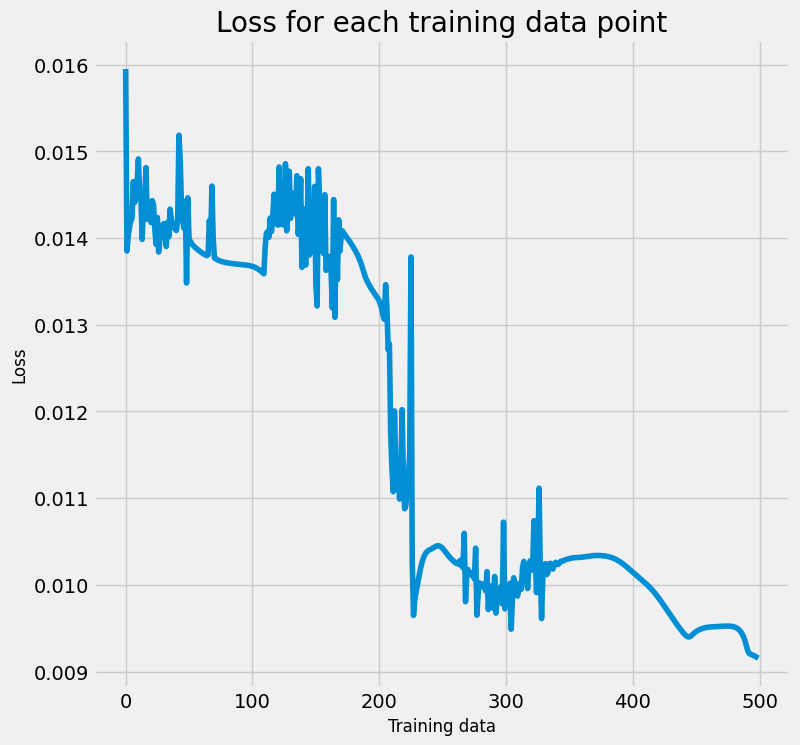

In [17]:
# 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(8, 8))
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

In [18]:
E_ani_train = []
y_train_pred =[]
E_ani_test = []
y_test_pred = []

In [19]:
 # Train predict phase:
for i in range(0, Inputrow):
        # calculate output value 
        Ytrain = np.dot(W_son, fi(Inputmatrix[i, :],cListe,sigmaListe))

        # calculate error term
        etrain = Outputmatrix[i, :] - Ytrain
        E_ani_train.append(0.5 * np.dot(etrain.T, etrain))
        y_train_pred.append(Ytrain)

In [20]:
 # Test predict phase:
for i in range(0, Inputtestrow):
        # calculate output value 
        Ytest = np.dot(W_son, fi(Inputtestmatrix[i, :],cListe,sigmaListe))

        # calculate error term
        etest = Outputmatrixtest[i, :] - Ytest
        E_ani_test.append(0.5 * np.dot(etest.T, etest))
        y_test_pred.append(Ytest)


In [21]:
y_test = test_Y.reshape(-1,1)
x_test = test_X
y_train = train_Y.reshape(-1,1)
x_train = train_X

In [22]:
# Scaling the predictions
y_train_pred = (scaler.inverse_transform(y_train_pred)).reshape(-1,1)
y_test_pred = (scaler.inverse_transform(y_test_pred)).reshape(-1,1)
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

In [23]:
score_tr = math.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train data score: %.2f RMSE" % score_tr)

score_t = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test data score: %.2f RMSE" % score_t)

Train data score: 10.62 RMSE
Test data score: 11.34 RMSE


In [24]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(y_train, y_train_pred)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(y_test, y_test_pred)
print("Test data score: %.2f MAPE" % error_mape_t)


Train data score: 17.68 MAPE
Test data score: 18.33 MAPE


In [25]:
mdape_tr = np.median((np.abs(np.subtract(y_train, y_train_pred)/ y_train))) * 100
print("Train data score: %.2f MdAPE" % mdape_tr)

mdape_t = np.median((np.abs(np.subtract(y_test, y_test_pred)/ y_test))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

Train data score: 15.74 MdAPE
Test data score: 16.25 MdAPE


In [26]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(y_train,y_train_pred)
print("Train data score: %.2f SMAPE" % error_smape_tr)

error_smape_t = smape(y_test,y_test_pred)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

Train data score: 19.84 SMAPE
Test data score: 20.78 SMAPE


In [27]:
from sklearn.metrics import mean_absolute_error
e_tr = y_train - y_train_pred
scale = mean_absolute_error(y_train[1:], y_train[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = y_test - y_test_pred
scale = mean_absolute_error(y_test[1:], y_test[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

Train data score: 1.69 MASE
Test data score: 1.75 MASE


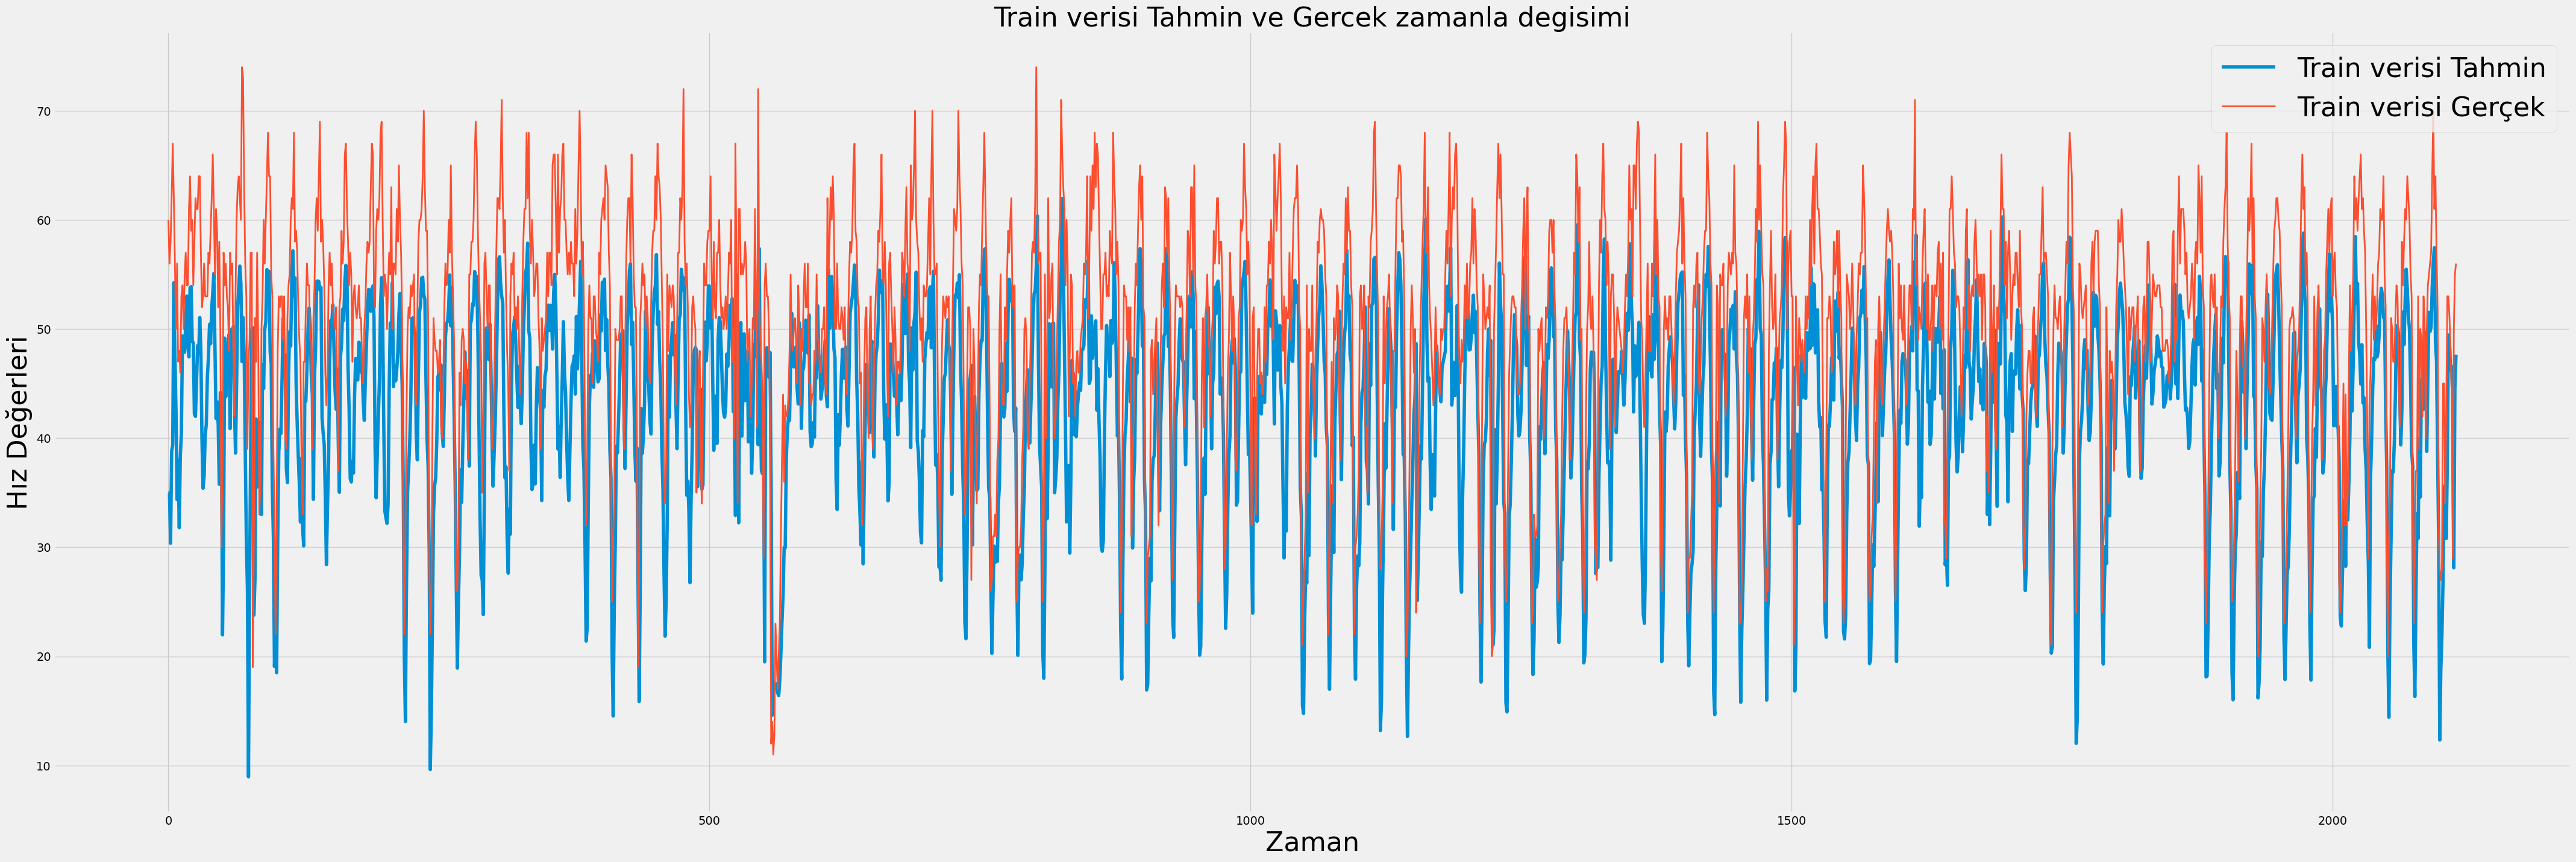

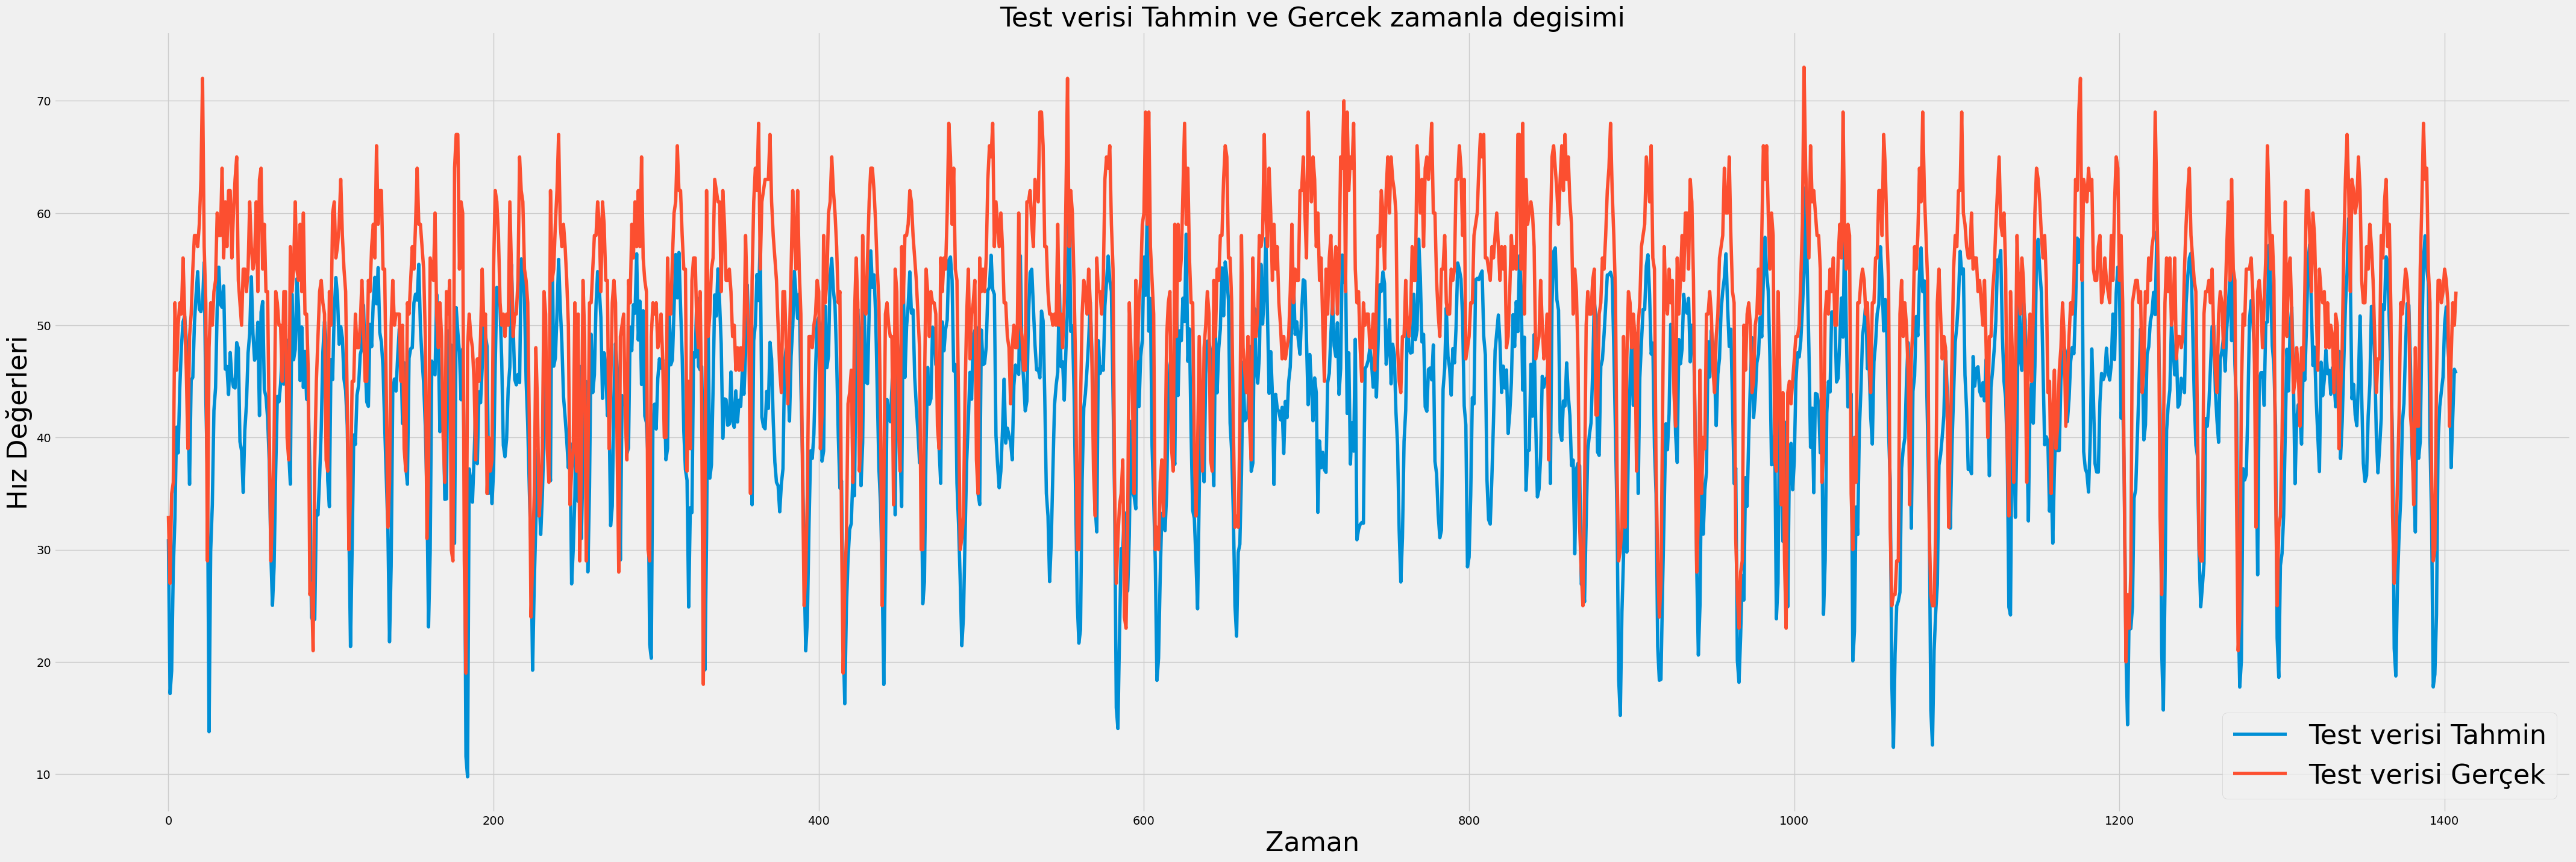

In [28]:
plt.figure(figsize=(48, 16))
plt.plot(y_train_pred, label = "Train verisi Tahmin")
plt.plot(y_train, label = "Train verisi Gerçek" , linewidth=2.0)
plt.title('Train verisi Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
plt.show()

plt.figure(figsize=(48, 16))
plt.plot(y_test_pred, label = "Test verisi Tahmin")
plt.plot(y_test, label = "Test verisi Gerçek")
plt.title('Test verisi Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
plt.show()